# Random Forest 

### Import Libraries

In [2]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)

### Import Dataset

In [46]:
df = pd.read_csv("../EDA/cleaned_df_2017-05-28.csv",  parse_dates=['timestamp'], index_col=False, low_memory=False)
build_state_df = pd.read_csv("../EDA/merged_w_state_build_year_2017-05-28.csv",  parse_dates=['timestamp'], index_col=False, low_memory=False)

df = df.merge(build_state_df[['id','age','state']], how='left', on='id', suffixes=('','_imputed'))

In [47]:
df

,timestamp,one_month_lag,three_month_lag,six_month_lag,twelve_month_lag,timestamp_1,timestamp_3,timestamp_6,timestamp_12,0_13_all,0_13_female,0_13_male,0_17_all,0_17_female,0_17_male,0_6_all,0_6_female,0_6_male,16_29_all,16_29_female,16_29_male,7_14_all,7_14_female,7_14_male,ID_big_road1,ID_big_road2,ID_bus_terminal,ID_metro,ID_railroad_station_avto,ID_railroad_station_walk,ID_railroad_terminal,additional_education_km,additional_education_raion,area_m,basketball_km,big_church_count_1000,big_church_count_1500,big_church_count_2000,big_church_count_3000,big_church_count_500,big_church_count_5000,big_church_km,big_market_km,big_road1_km,big_road2_km,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,build_count_before_1920,build_count_block,build_count_brick,build_count_foam,build_count_frame,build_count_mix,build_count_monolith,build_count_panel,build_count_slag,build_count_wood,build_year,bulvar_ring_km,bus_terminal_avto_km,cafe_avg_price_1000,cafe_avg_price_1500,cafe_avg_price_2000,cafe_avg_price_3000,cafe_avg_price_500,cafe_avg_price_5000,cafe_count_1000,cafe_count_1000_na_price,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_500,cafe_count_1000_price_high,cafe_count_1500,cafe_count_1500_na_price,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_500,cafe_count_1500_price_high,cafe_count_2000,cafe_count_2000_na_price,cafe_count_2000_price_1000,cafe_count_2000_price_1500,cafe_count_2000_price_2500,cafe_count_2000_price_4000,cafe_count_2000_price_500,cafe_count_2000_price_high,cafe_count_3000,cafe_count_3000_na_price,cafe_count_3000_price_1000,cafe_count_3000_price_1500,cafe_count_3000_price_2500,cafe_count_3000_price_4000,cafe_count_3000_price_500,cafe_count_3000_price_high,cafe_count_500,cafe_count_5000,cafe_count_5000_na_price,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_500,cafe_count_5000_price_high,cafe_count_500_na_price,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_500,cafe_count_500_price_high,cafe_sum_1000_max_price_avg,cafe_sum_1000_min_price_avg,cafe_sum_1500_max_price_avg,cafe_sum_1500_min_price_avg,cafe_sum_2000_max_price_avg,cafe_sum_2000_min_price_avg,cafe_sum_3000_max_price_avg,cafe_sum_3000_min_price_avg,cafe_sum_5000_max_price_avg,cafe_sum_5000_min_price_avg,cafe_sum_500_max_price_avg,cafe_sum_500_min_price_avg,catering_km,cemetery_km,children_preschool,children_school,church_count_1000,church_count_1500,church_count_2000,church_count_3000,church_count_500,church_count_5000,church_synagogue_km,culture_objects_top_25_raion,detention_facility_km,ekder_all,ekder_female,ekder_male,exhibition_km,female_f,fitness_km,floor,full_all,full_sq,green_part_1000,green_part_1500,green_part_2000,green_part_3000,green_part_500,green_part_5000,green_zone_km,green_zone_part,healthcare_centers_raion,hospice_morgue_km,hospital_beds_raion,ice_rink_km,id,incineration_km,indust_part,industrial_km,kindergarten_km,kitch_sq,kremlin_km,leisure_count_1000,leisure_count_1500,leisure_count_2000,leisure_count_3000,leisure_count_500,leisure_count_5000,life_sq,male_f,market_count_1000,market_count_1500,market_count_2000,market_count_3000,market_count_500,market_count_5000,market_shop_km,material,max_floor,metro_km_avto,metro_km_walk,metro_min_avto,metro_min_walk,mkad_km,mosque_count_1000,mosque_count_1500,mosque_count_2000,mosque_count_3000,mosque_count_500,mosque_count_5000,mosque_km,museum_km,nuclear_reactor_km,num_room,office_count_1000,office_count_1500,office_count_2000,office_count_3000,office_count_500,office_count_5000,office_km,office_raion,office_sqm_1000,office_sqm_1500,office_sqm_2000,office_sqm_3000,office_sqm_500,office_sqm_5000,oil_chemistry_km,park_km,power_transmission_

In [32]:
df['age_imputed']

KeyError: 'age_imputed'

### Select Features

In [64]:
features = ['timestamp', 'floor', 'full_sqrt', 'area_km', 'density','month','year','day',
                'max_floor', 'material', 'age_imputed', 'num_room', 'work_share','kitch_sq',
                'state_imputed', 'product_type', 'sub_area', 'indust_part', 'sport_objects_raion', 'oil_chemistry_raion', 'metro_min_avto',
               'green_zone_km', 'industrial_km', 'kremlin_km', 'radiation_km', 'ts_km', 'fitness_km',
               'stadium_km', 'park_km', 'price_doc_log']

In [65]:
for feature in features:
    if np.sum(df[feature].isnull()) > 0:
        print feature,np.sum(df[feature].isnull())

floor 167
full_sqrt 49
max_floor 9573
age_imputed 2929
state_imputed 2929
price_doc_log 7662


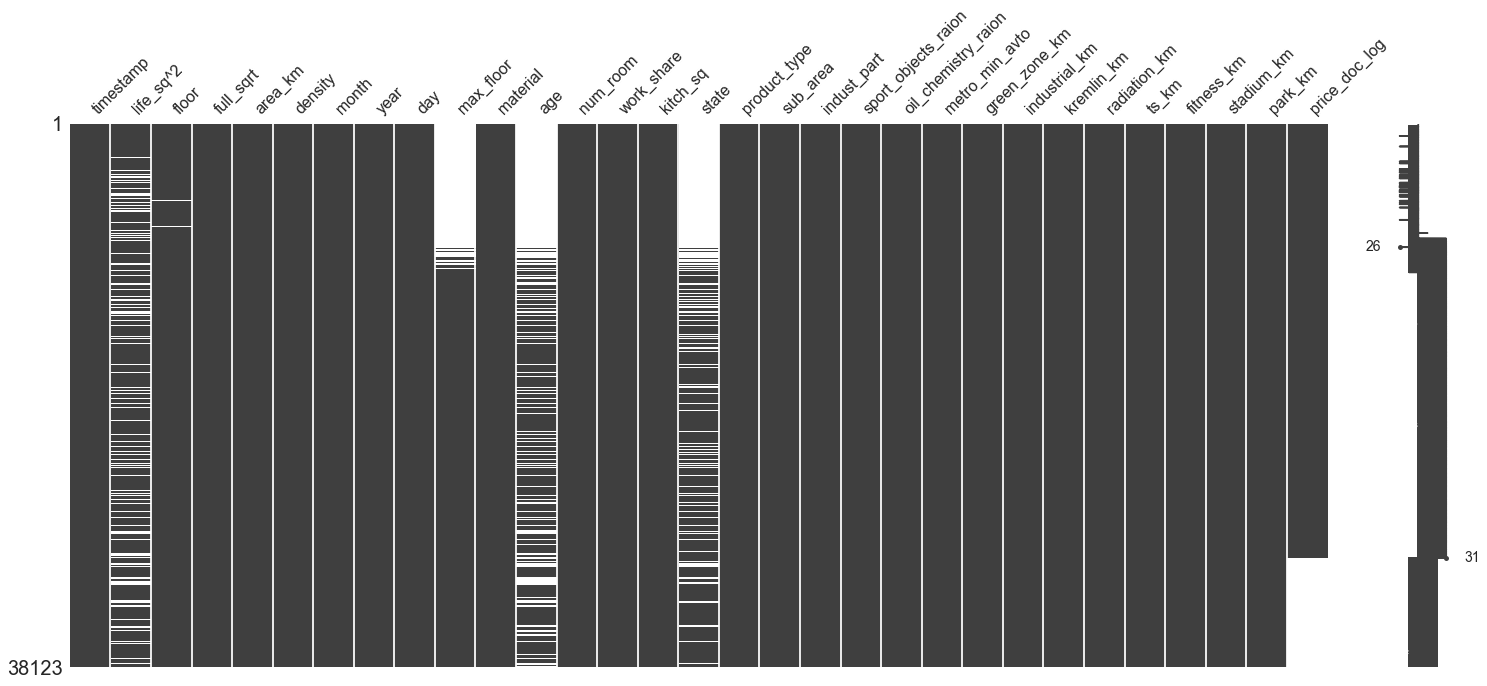

In [49]:
import missingno as msno

msno.matrix(df[feature_list])



In [58]:


df.loc[df['age_imputed'].isnull(),'price_doc_log'].isnull()

970      False
1174     False
1289     False
1693     False
2265     False
2267     False
2305     False
2346     False
2417     False
2436     False
2648     False
2782     False
3162     False
3257     False
3261     False
3265     False
3274     False
3287     False
3293     False
3295     False
3314     False
3317     False
3350     False
3359     False
3369     False
3379     False
3380     False
3382     False
3412     False
3437     False
         ...  
37726     True
37735     True
37752     True
37764     True
37777     True
37779     True
37794     True
37796     True
37834     True
37851     True
37876     True
37877     True
37912     True
37917     True
37919     True
37921     True
37937     True
37941     True
37942     True
37974     True
37980     True
37990     True
37991     True
38044     True
38046     True
38048     True
38083     True
38085     True
38117     True
38120     True
Name: price_doc_log, Length: 2929, dtype: bool

In [11]:
sample = pd.read_csv('../sample_submission.csv', index_col=False)

sample.head(10)

,id,price_doc
0,30474,7118500.41
1,30475,7118500.41
2,30476,7118500.41
3,30477,7118500.41
4,30478,7118500.41
5,30479,7118500.41
6,30480,7118500.41
7,30481,7118500.41
8,30482,7118500.41
9,30483,7118500.41


In [25]:
df.set_index('timestamp')
# df.loc[df['id'] == 30474, 'timestamp']

len(df.loc[df['timestamp'] > '2015-07-01', 'price_doc_log'])

7097

In [67]:
y_train = df.loc[df['price_doc_log'].notnull(), 'price_doc_log']
X_train = df.loc[df['price_doc_log'].notnull(), df.columns != 'price_doc_log']
X_test = df.loc[df['price_doc_log'].isnull(), df.columns != 'price_doc_log']

print y_train.shape, X_train.shape, X_test.shape

(30461,) (30461, 458) (7662, 458)


## Selecting Features

In [197]:
from sklearn.preprocessing import RandomForestRegressor

sample_leaf_options = [50,75,100,125,150]

for leaf_size in sample_leaf_options :
    rfr3 = RandomForestRegressor(n_estimators=1000, oob_score=True, n_jobs = -1,
                                   verbose = 1, random_state = 69, min_samples_leaf = leaf_size)
    # Train the model using the training sets and check score
    rfr3.fit(X3, y3.values.ravel())
    print "Leaf Size: %d" % (leaf_size)
    print rfr3.score(X3, y3)


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   28.6s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  2.9min finished


Leaf Size: 1


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.6s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    2.8s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    3.5s finished


0.903289750202


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   24.8s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   58.0s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  2.0min finished


Leaf Size: 5


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.1s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.9s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.3s finished


0.683725911737


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   18.7s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   45.8s


KeyboardInterrupt: 